notebook creates a barplot of regret values by RNN architectures

In [1]:
import os 
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import sem
import matplotlib.patches as mpatches

plt.rcParams.update({'font.size': 30})
plt.rcParams["figure.figsize"] = (20, 15)

In [2]:
#move up in directory
os.chdir('../')

In [3]:
os.getcwd()

'C:\\Users\\deniz\\Desktop\\PhD\\p1_generalization'

In [4]:
### CONFIG

PATH_HUMAN_DATA = 'data/human_raw_data/'
HUMAN_DATA_NAME = 'data_chakroun_wiehler.csv'

# number of human subjects
N_SUBS = 31
# number of trials (human & RNN)
N_TRIALS = 300
# number of rnn instances
N_IDS = 20
# Number of bandit walks
N_WALKS = 3

# path tp RNN data
PATH_RNN_DATA ='data/rnn_raw_data/'

# keys are labels for RNNs, values are filenames
RNN_DICT = {
  "Unit: LSTM; Noise: Update-dependent; Entropy: None; Algorithm: A2C": PATH_RNN_DATA + "lstm2_a2c_nh_48_lr_0_0001_n_u_p_0_5_ew_0_vw_0_5_dr_0_5_res_d_f_p_0_1_rt_con_a_4_n_300_te_50000_id_{}_test_b_daw_p_{}",
  "Unit: LSTM; Noise: Update-dependent; Entropy: Fixed; Algorithm: A2C": PATH_RNN_DATA + "lstm2_a2c_nh_48_lr_0_0001_n_u_p_0_5_ew_0_05_vw_0_5_dr_0_5_res_d_f_p_0_1_rt_con_a_4_n_300_te_50000_id_{}_test_b_daw_p_{}",
  "Unit: LSTM; Noise: Update-dependent; Entropy: Annealed; Algorithm: A2C": PATH_RNN_DATA + "lstm2_a2c_nh_48_lr_0_0001_n_u_p_0_5_ew_lin_vw_0_5_dr_0_5_res_d_f_p_0_1_rt_con_a_4_n_300_te_50000_id_{}_test_b_daw_p_{}",
  #"Unit: LSTM; Noise: Update-dependent; Entropy: None; Algorithm: A2C; NO PUNISH": PATH_RNN_DATA + "lstm2_a2c_nh_48_lr_0_0001_n_u_p_0_5_ew_0_vw_0_5_dr_0_5_res_d_f_p_0_1_rt_con_a_4_n_300_te_50000_id_{}_no_punish_test_b_daw_p_{}_check",
  
  # TO DO "Unit: LSTM; Noise: None; Entropy: None; Algorithm: A2C
  "Unit: LSTM; Noise: None; Entropy: None; Algorithm: A2C": PATH_RNN_DATA + "lstm_a2c_nh_48_lr_0_0001_n_n_p_0_ew_0_vw_0_5_dr_0_5_res_d_f_p_0_1_rt_con_a_4_n_300_te_50000_id_{}_test_b_daw_p_{}",
  "Unit: LSTM; Noise: None; Entropy: Fixed; Algorithm: A2C": PATH_RNN_DATA + "lstm_a2c_nh_48_lr_0_0001_n_n_p_0_ew_0_05_vw_0_5_dr_0_5_res_d_f_p_0_1_rt_con_a_4_n_300_te_50000_id_{}_test_b_daw_p_{}",
  "Unit: LSTM; Noise: None; Entropy: Annealed; Algorithm: A2C": PATH_RNN_DATA + "lstm_a2c_nh_48_lr_0_0001_n_n_p_0_ew_lin_vw_0_5_dr_0_5_res_d_f_p_0_1_rt_con_a_4_n_300_te_50000_id_{}_test_b_daw_p_{}",
  
  
  "Unit: LSTM; Noise: Update-dependent; Entropy: None; Algorithm: REINFORCE": PATH_RNN_DATA + "lstm2_rei_nh_48_lr_0_0001_n_u_p_0_5_ew_0_vw_0_5_dr_0_5_res_d_f_p_0_1_rt_con_a_4_n_300_te_50000_id_{}_test_b_daw_p_{}",
  "Unit: LSTM; Noise: Update-dependent; Entropy: Fixed; Algorithm: REINFORCE": PATH_RNN_DATA + "lstm2_rei_nh_48_lr_0_0001_n_u_p_0_5_ew_0_05_vw_0_5_dr_0_5_res_d_f_p_0_1_rt_con_a_4_n_300_te_50000_id_{}_test_b_daw_p_{}",
  "Unit: LSTM; Noise: Update-dependent; Entropy: Annealed; Algorithm: REINFORCE":  PATH_RNN_DATA + "lstm2_rei_nh_48_lr_0_0001_n_u_p_0_5_ew_lin_vw_0_5_dr_0_5_res_d_f_p_0_1_rt_con_a_4_n_300_te_50000_id_{}_test_b_daw_p_{}",
    
  "Unit: LSTM; Noise: None; Entropy: None; Algorithm: REINFORCE": PATH_RNN_DATA + "lstm_rei_nh_48_lr_0_0001_n_n_p_0_ew_0_vw_0_5_dr_0_5_res_d_f_p_0_1_rt_con_a_4_n_300_te_50000_id_{}_test_b_daw_p_{}",
  "Unit: LSTM; Noise: None; Entropy: Fixed; Algorithm: REINFORCE": PATH_RNN_DATA + "lstm_rei_nh_48_lr_0_0001_n_n_p_0_ew_0_05_vw_0_5_dr_0_5_res_d_f_p_0_1_rt_con_a_4_n_300_te_50000_id_{}_test_b_daw_p_{}",
  "Unit: LSTM; Noise: None; Entropy: Annealed; Algorithm: REINFORCE": PATH_RNN_DATA + "lstm_rei_nh_48_lr_0_0001_n_n_p_0_ew_lin_vw_0_5_dr_0_5_res_d_f_p_0_1_rt_con_a_4_n_300_te_50000_id_{}_test_b_daw_p_{}",
  
  #TODO 12 Models for RNN
  "Unit: RNN; Noise: Update-dependent; Entropy: None; Algorithm: A2C": PATH_RNN_DATA + "rnn_a2c_nh_48_lr_0_0001_n_u_p_0_5_ew_0_vw_0_5_dr_0_5_res_d_f_p_0_1_rt_con_a_4_n_300_te_50000_id_{}_test_b_daw_p_{}",
  "Unit: RNN; Noise: Update-dependent; Entropy: Fixed; Algorithm: A2C": PATH_RNN_DATA + "rnn_a2c_nh_48_lr_0_0001_n_u_p_0_5_ew_0_05_vw_0_5_dr_0_5_res_d_f_p_0_1_rt_con_a_4_n_300_te_50000_id_{}_test_b_daw_p_{}",
  "Unit: RNN; Noise: Update-dependent; Entropy: Annealed; Algorithm: A2C": PATH_RNN_DATA + "rnn_a2c_nh_48_lr_0_0001_n_u_p_0_5_ew_lin_vw_0_5_dr_0_5_res_d_f_p_0_1_rt_con_a_4_n_300_te_50000_id_{}_test_b_daw_p_{}",
  
  "Unit: RNN; Noise: Update-dependent; Entropy: None; Algorithm: REINFORCE": PATH_RNN_DATA + "rnn_rei_nh_48_lr_0_0001_n_u_p_0_5_ew_0_vw_0_5_dr_0_5_res_d_f_p_0_1_rt_con_a_4_n_300_te_50000_id_{}_test_b_daw_p_{}",
  "Unit: RNN; Noise: Update-dependent; Entropy: Fixed; Algorithm: REINFORCE": PATH_RNN_DATA + "rnn_rei_nh_48_lr_0_0001_n_u_p_0_5_ew_0_05_vw_0_5_dr_0_5_res_d_f_p_0_1_rt_con_a_4_n_300_te_50000_id_{}_test_b_daw_p_{}",
  "Unit: RNN; Noise: Update-dependent; Entropy: Annealed; Algorithm: REINFORCE": PATH_RNN_DATA + "rnn_rei_nh_48_lr_0_0001_n_u_p_0_5_ew_lin_vw_0_5_dr_0_5_res_d_f_p_0_1_rt_con_a_4_n_300_te_50000_id_{}_test_b_daw_p_{}",
 
  "Unit: RNN; Noise: None; Entropy: None; Algorithm: A2C": PATH_RNN_DATA + "rnn_a2c_nh_48_lr_0_0001_n_n_p_0_ew_0_vw_0_5_dr_0_5_res_d_f_p_0_1_rt_con_a_4_n_300_te_50000_id_{}_test_b_daw_p_{}",
  "Unit: RNN; Noise: None; Entropy: Fixed; Algorithm: A2C": PATH_RNN_DATA + "rnn_a2c_nh_48_lr_0_0001_n_n_p_0_ew_0_05_vw_0_5_dr_0_5_res_d_f_p_0_1_rt_con_a_4_n_300_te_50000_id_{}_test_b_daw_p_{}",
  "Unit: RNN; Noise: None; Entropy: Annealed; Algorithm: A2C": PATH_RNN_DATA + "rnn_a2c_nh_48_lr_0_0001_n_n_p_0_ew_lin_vw_0_5_dr_0_5_res_d_f_p_0_1_rt_con_a_4_n_300_te_50000_id_{}_test_b_daw_p_{}",
 
  "Unit: RNN; Noise: None; Entropy: None; Algorithm: REINFORCE": PATH_RNN_DATA + "rnn_rei_nh_48_lr_0_0001_n_n_p_0_ew_0_vw_0_5_dr_0_5_res_d_f_p_0_1_rt_con_a_4_n_300_te_50000_id_{}_test_b_daw_p_{}",
  "Unit: RNN; Noise: None; Entropy: Fixed; Algorithm: REINFORCE": PATH_RNN_DATA + "rnn_rei_nh_48_lr_0_0001_n_n_p_0_ew_0_05_vw_0_5_dr_0_5_res_d_f_p_0_1_rt_con_a_4_n_300_te_50000_id_{}_test_b_daw_p_{}",
  "Unit: RNN; Noise: None; Entropy: Annealed; Algorithm: REINFORCE": PATH_RNN_DATA + "rnn_rei_nh_48_lr_0_0001_n_n_p_0_ew_lin_vw_0_5_dr_0_5_res_d_f_p_0_1_rt_con_a_4_n_300_te_50000_id_{}_test_b_daw_p_{}",
 
    
}

# function to flatten lists
def flatten(l):
    return [item for sublist in l for item in sublist]

# TODO
# müssen noch 0-10 ids trainiert werden
# "Unit: LSTM; Noise: None; Entropy: None; Algorithm: A2C": PATH_RNN_DATA + "lstm_a2c_nh_48_lr_0_0001_n_n_p_0_ew_0_vw_0_5_dr_0_5_res_d_f_p_0_1_rt_con_a_4_n_300_te_50000_id_{}_test_b_daw_p_{}",


In [5]:
# cumulative regret for human data

human_df = pd.read_csv(open(PATH_HUMAN_DATA + HUMAN_DATA_NAME, 'rb'), index_col=0)


cum_reg_human = np.zeros([N_TRIALS,N_SUBS])

for sub in range(1,N_SUBS+1):
    sub_df = human_df.loc[human_df.vp == sub,:]
    chosen_reward = [[p1,p2,p3,p4][ch-1] if ch != 0 else np.mean([p1,p2,p3,p4]) for ch, p1, p2, p3, p4 in zip(sub_df['choice'], sub_df['reward_b1'], sub_df['reward_b2'], sub_df['reward_b3'], sub_df['reward_b4'])]
    sub_df['reward'] = chosen_reward
    best_reward = np.array(np.max(sub_df[['reward_b1', 'reward_b2', 'reward_b3', 'reward_b4']], axis = 1))
    # calculate cumulative regret
    cum_reg_human[:,sub-1] = np.cumsum(best_reward - chosen_reward)

C:\Users\deniz\AppData\Local\anaconda3\envs\rnn\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\deniz\AppData\Local\anaconda3\envs\rnn\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\deniz\AppData\Local\anaconda3\envs\rnn\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value

In [6]:
# define function to calculate cumulative regret for RNN data
def get_regret_rnn(file_path, n_trials = 300, n_walks = 3, n_ids = 20):

    cum_reg_lstm = np.zeros([n_trials,n_ids*n_walks])

    for id_ in range(n_ids):
        for walk in range(1,n_walks+1):
            
            d = pickle.load(open(file_path.format(id_, walk), 'rb'))
            df = d.reset_index()
            chosen_reward = [[p1,p2,p3,p4][ch] for ch, p1, p2, p3, p4 in zip(df['choice'], df['p_rew_1'], df['p_rew_2'], df['p_rew_3'], df['p_rew_4'])]
            best_reward = np.array(np.max(df[['p_rew_1', 'p_rew_2', 'p_rew_3', 'p_rew_4']], axis = 1))
            # calculate cumulative regret (mult with 100 to compare to human data)
            cum_reg_lstm[:,(n_ids*(walk-1))+id_] = np.cumsum(np.multiply(best_reward,100) - np.multiply(chosen_reward,100))
            
    return(cum_reg_lstm)

Human
713.9065418252201
5.345841816590718


Text(0, 0.5, 'Cumulative regret')

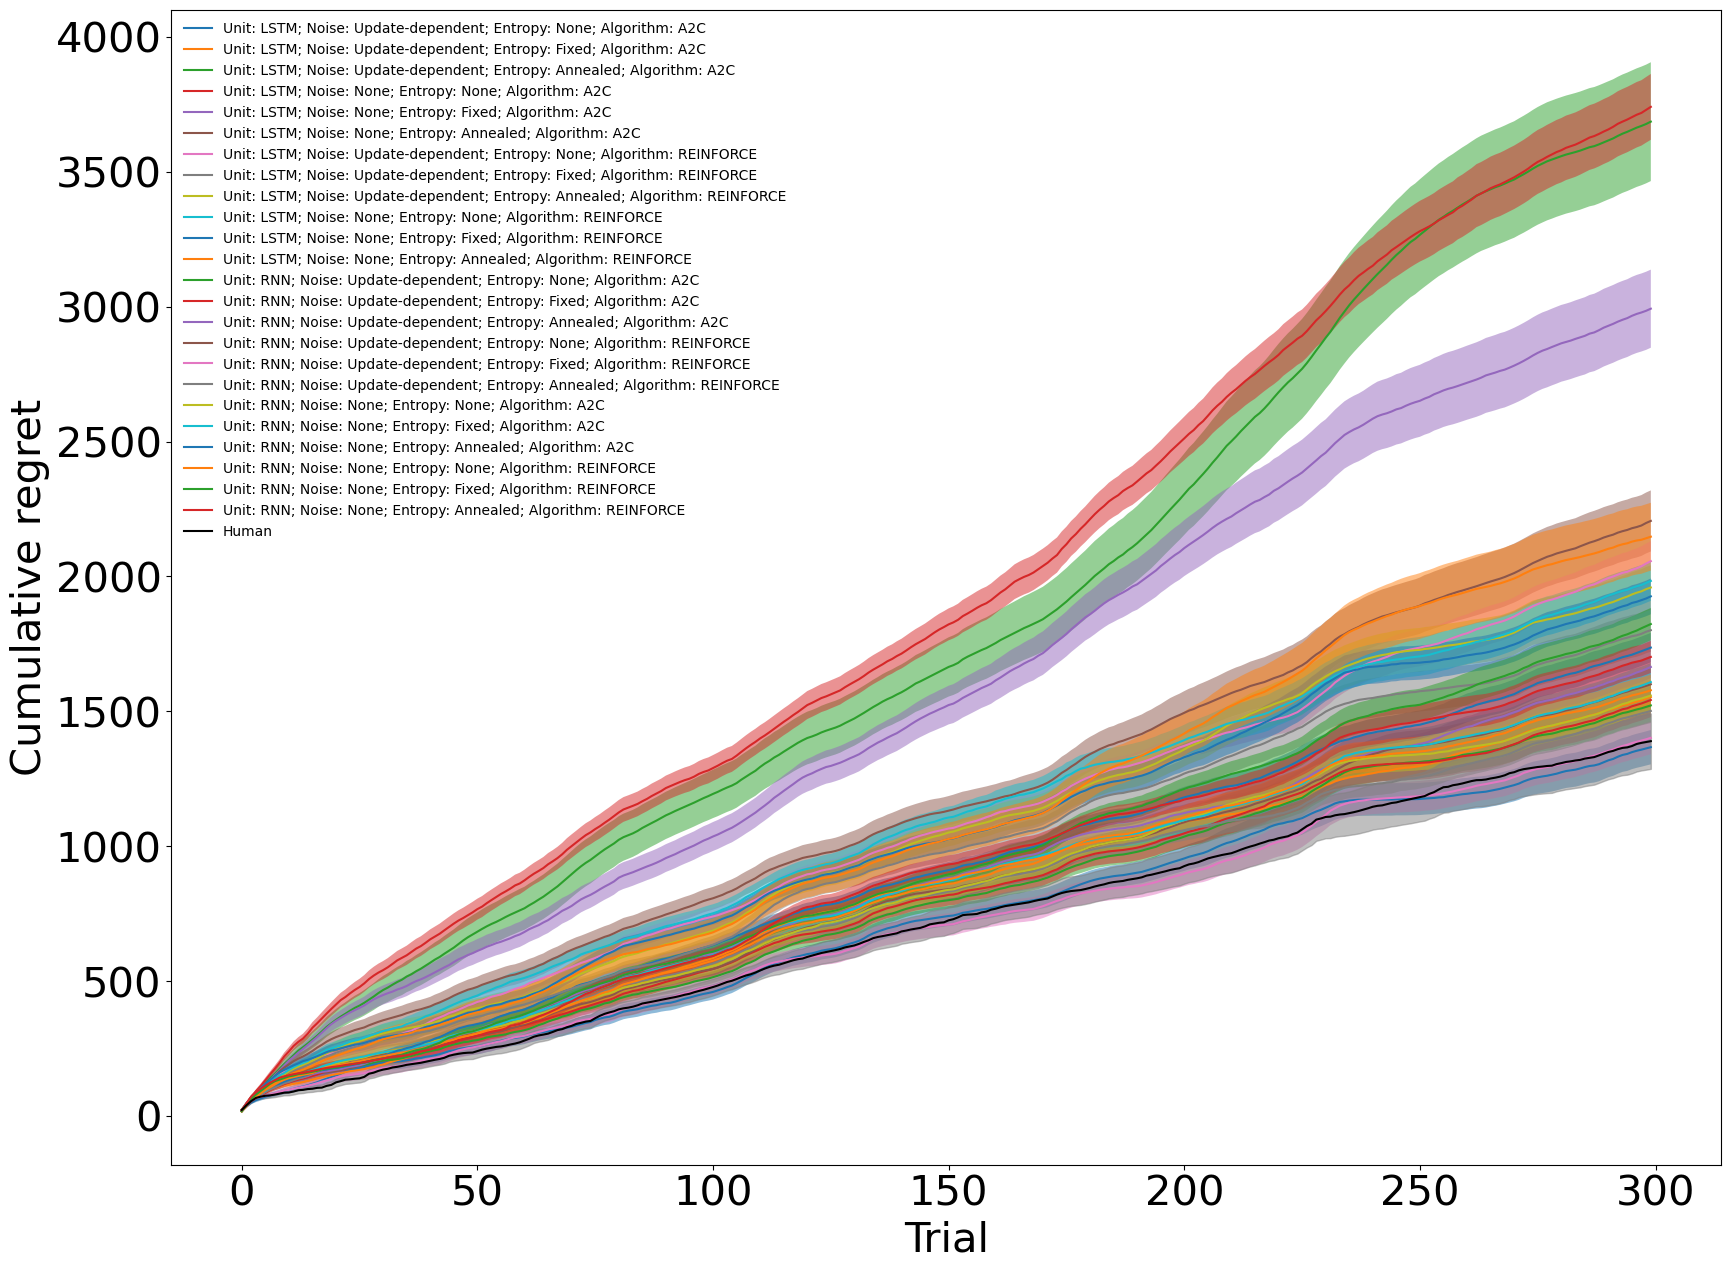

In [7]:
# plot cumulative regret

# create lists for barplots later
#id = []
noise = []
entropy = []
algorithm = []
final_regret = []

# RNNs
for key, value in RNN_DICT.items():
    
    # noise
    if 'Noise: Update-dependent' in key:
        noise += (N_WALKS*N_IDS) * ['Weber']
        
    elif 'Noise: None' in key:
        noise += (N_WALKS*N_IDS) * ['None']
    
    # entropy
    if 'Entropy: Annealed' in key:
        entropy += (N_WALKS*N_IDS)*['Annealed']
        
    elif 'Entropy: Fixed' in key:
        entropy += (N_WALKS*N_IDS) * ['Fixed']
    
    elif 'Entropy: None' in key:
        entropy += (N_WALKS*N_IDS) * ['None']
        
    # algorithm
    if 'Algorithm: A2C' in key:
        algorithm += (N_WALKS*N_IDS) * ['A2C']
        
    elif 'Algorithm: REINFORCE' in key:
        algorithm += (N_WALKS*N_IDS) * ['REINFORCE']
    
    regret = get_regret_rnn(value, n_ids = N_IDS)
    
    # final regret
    final_regret += [regret[N_TRIALS-1,:]]
    
    se = sem(regret, axis = 1)
    mean_regret = np.mean(regret, axis = 1)
    
    plt.plot(mean_regret, label = key)
    plt.fill_between(range(N_TRIALS), mean_regret - se, mean_regret + se, alpha=0.5)
    
    #print(key)
    #print(np.mean(regret.flatten()))
    #print(sem(regret.flatten()))

# human
mean_regret = np.mean(cum_reg_human, axis = 1)
se = sem(cum_reg_human, axis = 1)
plt.plot(mean_regret, color = 'black', label = 'Human')
plt.fill_between(range(N_TRIALS), mean_regret - se, mean_regret + se, color = 'grey', alpha=0.5)
   
plt.legend(frameon= False, prop={'size': 10})

print('Human')
print(np.mean(cum_reg_human.flatten()))
print(sem(cum_reg_human.flatten()))

plt.xlabel('Trial')
plt.ylabel('Cumulative regret')

#plt.savefig('../p1_generalization/plots/regret_plot_all.png', dpi = 300)

    
    
    

In [8]:
# cumulative regret in last trial is relevant
#last_cum_reg_human = cum_reg_human[N_TRIALS-1,:]
#last_cum_reg_rnn = regret[N_TRIALS-1,:]

In [9]:
# create df
df = pd.DataFrame({
    'noise': noise,
    'entropy': entropy,
    'algorithm': algorithm,
    'final_regret': flatten(final_regret)
    
})



In [10]:
df.groupby(['noise', 'entropy', 'algorithm']).mean()

final_regret
noise entropy  algorithm              
None  Annealed A2C         1763.292621
               REINFORCE   1640.001646
      Fixed    A2C         1823.966732
               REINFORCE   1779.948598
      None     A2C         1750.611130
               REINFORCE   1877.989225
Weber Annealed A2C         2257.183480
               REINFORCE   1679.614174
      Fixed    A2C         2646.626253
               REINFORCE   1779.121047
      None     A2C         2526.354859
               REINFORCE   1803.873376

In [11]:
df.groupby(['noise', 'entropy', 'algorithm']).sem()

final_regret
noise entropy  algorithm              
None  Annealed A2C           46.891406
               REINFORCE     41.907371
      Fixed    A2C           44.676419
               REINFORCE     40.595769
      None     A2C           55.150934
               REINFORCE     75.912115
Weber Annealed A2C          103.357008
               REINFORCE     51.203270
      Fixed    A2C          118.797512
               REINFORCE     49.973600
      None     A2C          155.913257
               REINFORCE     73.718822

In [12]:
# get mean df
mean_df = df.groupby(['noise', 'entropy', 'algorithm']).mean().reset_index()

# get sem df
sem_df = df.groupby(['noise', 'entropy', 'algorithm']).sem().reset_index()

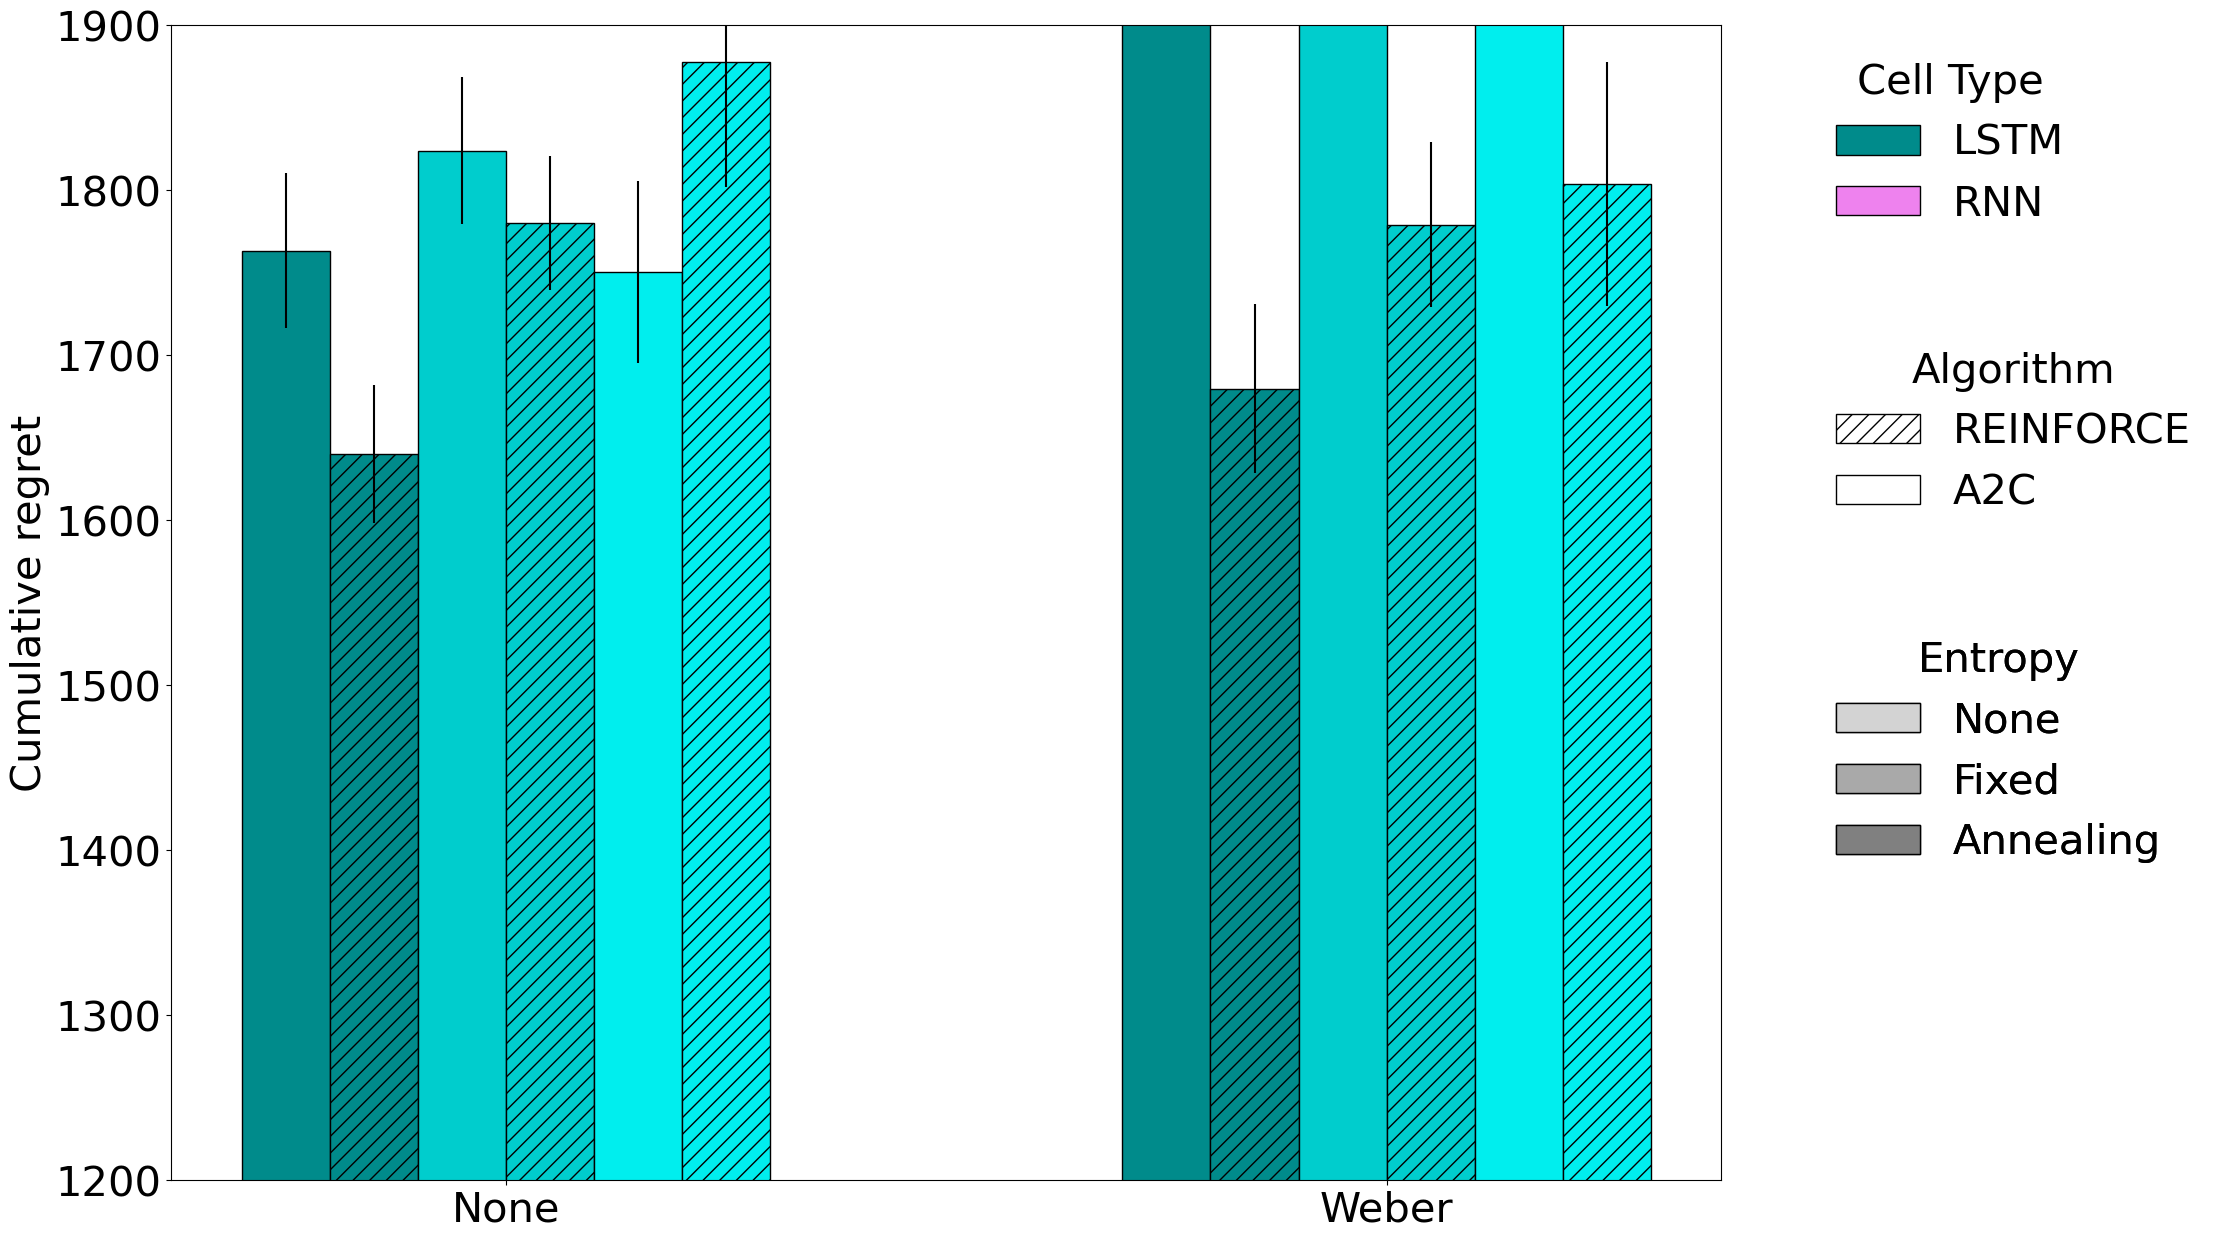

In [13]:
labels = ['None', 'Weber']

mean_lstm_an_a2c = mean_df['final_regret'][(mean_df['entropy']=='Annealed') & (mean_df['algorithm']=='A2C')].values
mean_lstm_an_rei = mean_df['final_regret'][(mean_df['entropy']=='Annealed') & (mean_df['algorithm']=='REINFORCE')].values

sem_lstm_an_a2c = sem_df['final_regret'][(sem_df['entropy']=='Annealed') & (sem_df['algorithm']=='A2C')].values
sem_lstm_an_rei = sem_df['final_regret'][(sem_df['entropy']=='Annealed') & (sem_df['algorithm']=='REINFORCE')].values


mean_lstm_fi_a2c = mean_df['final_regret'][(mean_df['entropy']=='Fixed') & (mean_df['algorithm']=='A2C')].values
mean_lstm_fi_rei = mean_df['final_regret'][(mean_df['entropy']=='Fixed') & (mean_df['algorithm']=='REINFORCE')].values

sem_lstm_fi_a2c = sem_df['final_regret'][(sem_df['entropy']=='Fixed') & (sem_df['algorithm']=='A2C')].values
sem_lstm_fi_rei = sem_df['final_regret'][(sem_df['entropy']=='Fixed') & (sem_df['algorithm']=='REINFORCE')].values

mean_lstm_no_a2c = mean_df['final_regret'][(mean_df['entropy']=='None') & (mean_df['algorithm']=='A2C')].values
mean_lstm_no_rei = mean_df['final_regret'][(mean_df['entropy']=='None') & (mean_df['algorithm']=='REINFORCE')].values

sem_lstm_no_a2c = sem_df['final_regret'][(sem_df['entropy']=='None') & (sem_df['algorithm']=='A2C')].values
sem_lstm_no_rei = sem_df['final_regret'][(sem_df['entropy']=='None') & (sem_df['algorithm']=='REINFORCE')].values


x = np.arange(len(labels))  # the label locations
width = 0.1  # the width of the bars

fig, ax = plt.subplots()
ax.bar(x - width*2.5, mean_lstm_an_a2c, width, label='an_a2c', color = '#008B8B', edgecolor='black', yerr = sem_lstm_an_a2c)
ax.bar(x - width*1.5, mean_lstm_an_rei, width, label='an_rei', color = '#008B8B', edgecolor='black', yerr = sem_lstm_an_rei, hatch='//')

ax.bar(x - width/2, mean_lstm_fi_a2c, width, label='fi_a2c', color = '#00CDCD', edgecolor='black', yerr = sem_lstm_fi_a2c)
ax.bar(x + width/2, mean_lstm_fi_rei, width, label='fi_rei', color = '#00CDCD', edgecolor='black', yerr = sem_lstm_fi_rei, hatch='//')

ax.bar(x + width*1.5, mean_lstm_no_a2c, width, label='no_a2c', color = '#00EEEE', edgecolor='black', yerr = sem_lstm_no_a2c)
ax.bar(x + width*2.5, mean_lstm_no_rei, width, label='no_rei', color = '#00EEEE', edgecolor='black', yerr = sem_lstm_no_rei, hatch='//')


# Add some text for labels, title and custom x-axis tick labels, etc.
#ax.set_ylabel('Scores')
#ax.set_title('Scores by group and gender')
ax.set_xticks(x, labels)

# create legend
red_patch = mpatches.Patch(facecolor='#008B8B', label='LSTM', edgecolor = 'black')
blue_patch = mpatches.Patch(facecolor='violet', label= 'RNN', edgecolor = 'black')
circ1 = mpatches.Patch( facecolor='white',hatch=r'//',label='REINFORCE', edgecolor = 'black')
circ2 = mpatches.Patch( facecolor='white',label='A2C', edgecolor = 'black')
grey1_patch = mpatches.Patch(facecolor='lightgrey', label='None', edgecolor = 'black')
grey2_patch = mpatches.Patch(facecolor='darkgrey', label= 'Fixed', edgecolor = 'black')
grey3_patch = mpatches.Patch(facecolor='grey', label= 'Annealing', edgecolor = 'black')

l1 = plt.legend(handles=[red_patch, blue_patch], title =  'Cell Type', frameon=False, bbox_to_anchor=(1.05, 1), loc="upper left")
plt.gca().add_artist(l1)

l2 = plt.legend(handles=[circ1, circ2], title =  'Algorithm', frameon=False, bbox_to_anchor=(1.05, 0.75), loc="upper left")
plt.gca().add_artist(l2)

l3 = plt.legend(handles=[grey1_patch,grey2_patch, grey3_patch], title =  'Entropy', frameon=False, bbox_to_anchor=(1.05, 0.5), loc="upper left")
plt.gca().add_artist(l3)
plt.ylim((1200, 1900))

# labels 
plt.ylabel("Cumulative regret")

plt.savefig('../p1_generalization/plots/regret_all_rnns.png', dpi = 600)
